# Predicting the Sale Price of Houses

In [542]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import graphviz

from sklearn import datasets, linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import Image 

In [543]:
df = pd.read_csv("train.csv")

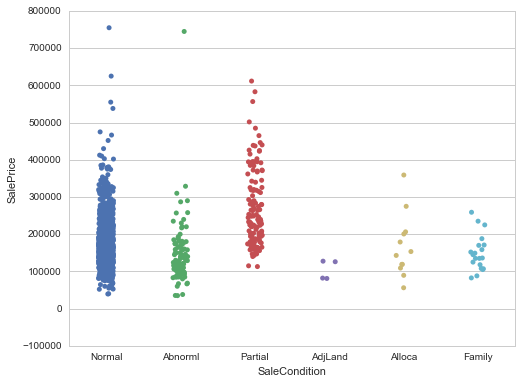

In [431]:
sns.set(style="whitegrid", color_codes=True)
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="SaleCondition", y="SalePrice", data=df,jitter=True);

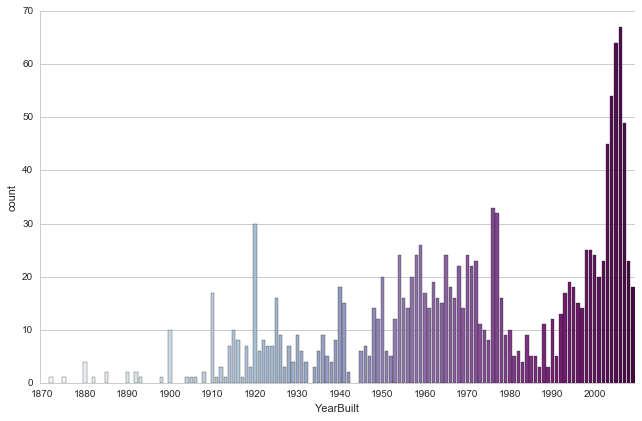

In [432]:
years = np.arange(1870, 2010)
g = sns.factorplot(x="YearBuilt", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=10)

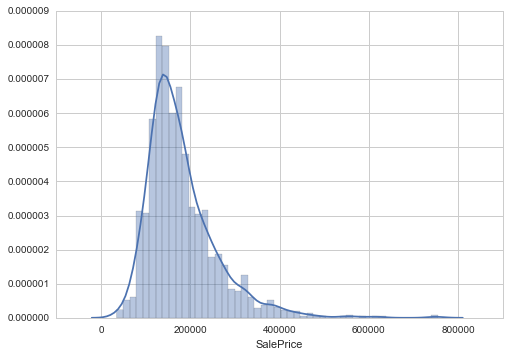

In [433]:
sns.distplot(df['SalePrice']);

In [434]:
df[df['SalePrice'] == 755000.000000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [435]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [436]:
print df[df['LotArea'] == 215245]

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
313         Low    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
313       0      6   2009        WD         Normal     375000  

[1 rows x 81 columns]


In [437]:
# df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 
#  'BsmtFinType1','BsmtFinSF1','BsmtFinType2',
#    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].to_dict()
#df.ix[df['Alley'].isnull()].to_dict()['Street']
#df.ix[df['MiscFeature'].isnull()].to_dict()['MiscVal']
#df['Fence'].describe()

In [438]:
for i in df.columns:
    print i,df[i][313],df[i][691]

Id 314 692
MSSubClass 20 60
MSZoning RL RL
LotFrontage 150.0 104.0
LotArea 215245 21535
Street Pave Pave
Alley nan nan
LotShape IR3 IR1
LandContour Low Lvl
Utilities AllPub AllPub
LotConfig Inside Corner
LandSlope Sev Gtl
Neighborhood Timber NoRidge
Condition1 Norm Norm
Condition2 Norm Norm
BldgType 1Fam 1Fam
HouseStyle 1Story 2Story
OverallQual 7 10
OverallCond 5 6
YearBuilt 1965 1994
YearRemodAdd 1965 1995
RoofStyle Hip Gable
RoofMatl CompShg WdShngl
Exterior1st BrkFace HdBoard
Exterior2nd BrkFace HdBoard
MasVnrType None BrkFace
MasVnrArea 0.0 1170.0
ExterQual TA Ex
ExterCond TA TA
Foundation CBlock PConc
BsmtQual Gd Ex
BsmtCond TA TA
BsmtExposure Gd Gd
BsmtFinType1 ALQ GLQ
BsmtFinSF1 1236 1455
BsmtFinType2 Rec Unf
BsmtFinSF2 820 0
BsmtUnfSF 80 989
TotalBsmtSF 2136 2444
Heating GasW GasA
HeatingQC TA Ex
CentralAir Y Y
Electrical SBrkr SBrkr
1stFlrSF 2036 2444
2ndFlrSF 0 1872
LowQualFinSF 0 0
GrLivArea 2036 4316
BsmtFullBath 2 0
BsmtHalfBath 0 1
FullBath 2 3
HalfBath 0 1
BedroomAbvGr 

In [439]:
df['LotFrontage'].fillna(0,inplace=True)
df['Alley'].fillna('NA',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['BsmtExposure'].fillna('NA',inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['Electrical'].fillna('SBrkr',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['GarageType'].fillna('NA',inplace=True)

# Remove column
#df['GarageYrBlt'].fillna('None',inplace=True)

df['GarageFinish'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['PoolQC'].fillna('NA',inplace=True)
df['Fence'].fillna('MnWw',inplace=True)
df['MiscFeature'].fillna('NA',inplace=True)


In [440]:
def find_missing_columns(df):
    lst_nmissing = []
    lst_missing = []
    for c in df.columns:
        if not (df[c].count() < 1460):
            lst_nmissing.append(c)
        else:
            #print c, df[c].count()
            lst_missing.append(c)
    #print lst_missing
    
    print "Number of Columns with no missing value:",len(lst_nmissing)
    
    print "Number of Columns with missing value:",len(lst_missing)
    
    #lst_missing.append('SalePrice')
    
    #lst_missing.append('TotalBsmtSF')
    return lst_missing,lst_nmissing
missing_c,notmissing_c = find_missing_columns(df)
fill_df = df[notmissing_c]

Number of Columns with no missing value: 80
Number of Columns with missing value: 1


In [441]:
def vectorize(df):
    
    data = df.to_dict(orient='records')
    
    vec = DictVectorizer()
    
    vec_data = vec.fit_transform(data).toarray()
    
    return vec,vec_data

In [529]:
def linear_regr(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    regr = linear_model.LinearRegression()
    
    #fit model
    regr.fit(X_train, y_train)
    
    predicted = regr.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    plot_actual_predicted(actvspred_df)
    
    #print actvspred_df
    
    # The coefficients
    #print('Coefficients: \n', regr.coef_)
    
    # The mean squared error
    print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))
    
    #plot_coeffs(regr.coef_,feature_names,"Linear")


In [530]:
def plot_coeffs(coeffs,feature_names,model_name):
    
    coeff = pd.Series(coeffs,index = feature_names )
    imp_coef = pd.concat([coeff.sort_values().head(10),
                     coeff.sort_values().tail(10)])
    
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    print 
    plt.title("Coefficients in the "+model_name+" Model")

In [533]:
def decision_Tree(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #print X_train.shape, X_test.shape, y_train.shape, y_test.shape
    
    dtree = tree.DecisionTreeClassifier()
    dtree.fit(train, target)
    
    #fit model
    dtree.fit(X_train, y_train)
    
    predicted = dtree.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    plot_actual_predicted(actvspred_df)
    
    # The mean squared error
    print("Mean squared error: %.2f" % np.mean((dtree.predict(X_test) - y_test) ** 2))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % dtree.score(X_test, y_test))
    
    #plot_decision_tree(dtree,feature_names)
    
def plot_decision_tree_flowchart(dtree,t_feature_names):
    
    with open('/Users/aramamurthy/Downloads/Github/Kaggle-HPAR/tree.dot','w') as dotfile:
        export_graphviz(dtree,dotfile,feature_names=t_feature_names)
    
    graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
    graph.write_png('/Users/aramamurthy/Downloads/Github/Kaggle-HPAR/tree_diagram.png')
        
def plot_actual_predicted(df):
    
    g = sns.jointplot( "Predicted","Actual", data=df, kind="reg")
   

In [559]:
def adaboost(train,target,feature_names):

    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    rng = np.random.RandomState(1)
    
    regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                              n_estimators=300, random_state=rng)
    
    
    regr.fit(X_train, y_train)

    # Predict
    predicted = regr.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    print actvspred_df
    
    plot_actual_predicted(actvspred_df)
    

In [560]:
def decision_tree_regr(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    regr = DecisionTreeRegressor(max_depth=4)
    regr.fit(X_train, y_train)
    
    predicted = regr.predict(X_test)
    
    data = zip(y_test.tolist(),predicted)
    
    actvspred_df = pd.DataFrame(data,columns=['Actual','Predicted'])
    
    print actvspred_df
    
    plot_actual_predicted(actvspred_df)

     Actual      Predicted
0    154500  148538.362903
1    325000  429574.000000
2    115000  148538.362903
3    159000  181752.554745
4    315500  345573.266667
5     75500  113886.407407
6    311500  200990.668966
7    146000  181752.554745
8     84500  113886.407407
9    135500  145540.200000
10   145000  154803.642857
11   130000  113886.407407
12    81000  113886.407407
13   214000  200990.668966
14   181000  145540.200000
15   134500  148538.362903
16   183500  200990.668966
17   135000  148538.362903
18   118400  148538.362903
19   226000  200990.668966
20   155000  145540.200000
21   210000  242443.955882
22   173500  145540.200000
23   129000  113886.407407
24   192000  200990.668966
25   153900  148538.362903
26   181134  200990.668966
27   141000  113886.407407
28   181000  145540.200000
29   208900  200990.668966
..      ...            ...
452  197000  280986.250000
453  161500  145540.200000
454   85000  148538.362903
455  203000  200990.668966
456  325000  345573.266667
4

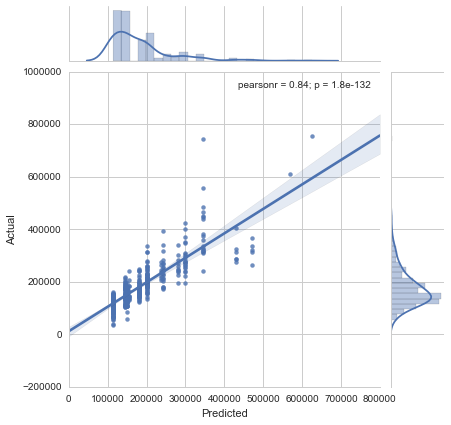

In [562]:
# reduced = df.columns.tolist()
# # removing certain fields
# reduced.remove('Alley')
# reduced.remove('PoolQC')
# reduced.remove('Fence')
# reduced.remove('MiscFeature')

# # removing rows that have missing fields
# refined_df = refined_df.dropna()

# #removing target variable to get the train set
# reduced.remove('SalePrice')
# train_df = refined_df[reduced]

# #have the target variable
# target_df = refined_df['SalePrice']

# #vectorize train 
# vec,train = vectorize(train_df)

# #call the regression method
# #linear_regr(train,target_df,vec.get_feature_names())

# imp_features_linear = ['LotArea','BsmtExposure', '1stFlrSF', 'BldgType', 'BsmtFinType1',
#                        'BsmtCond', '2ndFlrSF', 'LowQualFinSF','TotalBsmtSF','GrLivArea','SalePrice']
# linear_df = refined_df[imp_features_linear]

def preprocessing(df):
    
    train = df.columns.tolist()
    
    train.remove('SalePrice')
    
    train.remove('Id')
    
    train.remove('Alley')
    
    train_df = df[train]
    
    target_df = df['SalePrice']
    
    vec,train = vectorize(train_df)
    
    return vec,train

#call the regression method
vec,train = preprocessing(fill_df)
# linear_regr(train,target_df,vec.get_feature_names())

# call decsion tree
#decision_Tree(train,target_df,vec.get_feature_names())

#adaboost(train,target_df,vec.get_feature_names())

decision_tree_regr(train,target_df,vec.get_feature_names())